## Import Libraries


In [1]:
import numpy as np
import pandas as pd

## Get the data

In [3]:
column_names=['user_id','item_id','rating','timestamp']
df = pd.read_csv('/content/u.data', sep='\t', names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Now let's get the movie titles

In [5]:
movie_titles = pd.read_csv("/content/Movie_Id_Titles.txt")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


We can merge them together

In [6]:
df=pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## EDA

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings

In [8]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [10]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


Now set the number of ratings column

In [11]:
ratings['num_of_ratings']=pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Let's plot few Histograms

<Axes: >

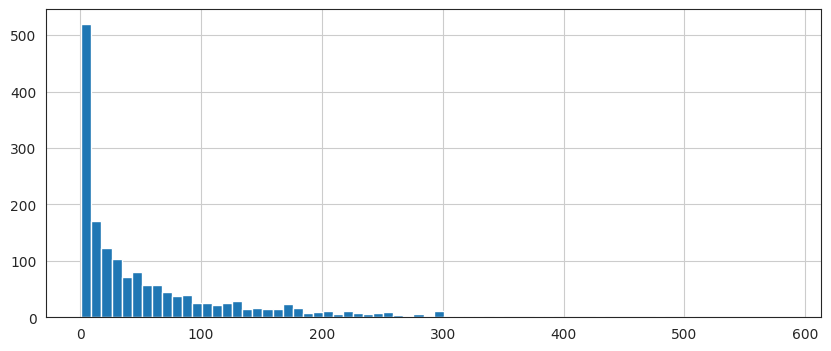

In [12]:
plt.figure(figsize=(10,4))
ratings['num_of_ratings'].hist(bins=70)

<Axes: >

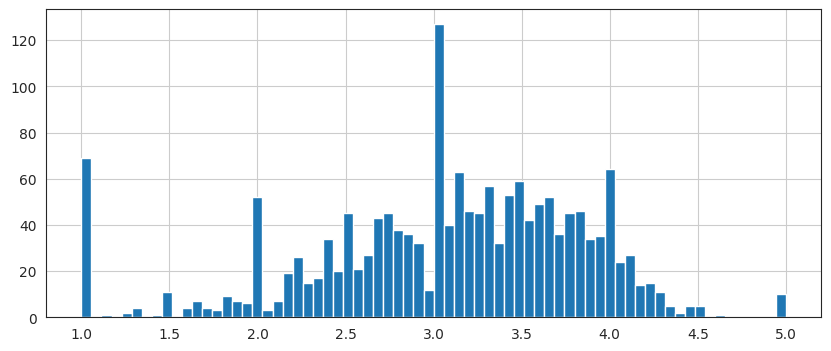

In [14]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

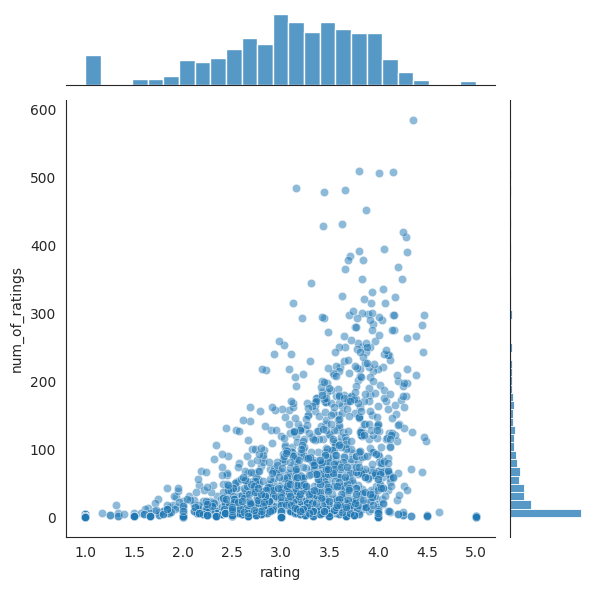

In [15]:
sns.jointplot(x='rating',y='num_of_ratings',data=ratings,alpha=0.5)

Now let's create a simple recommendation system

## Recommending Similar Movies

In [17]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most Rated Movie

In [18]:
ratings.sort_values('num_of_ratings',ascending=False).head(10)

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's choose two movies: disclosure, a thriller movie. And jurassic park, a sci-fi.

In [19]:
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now let's grab the user ratings for those two movies

In [20]:
disclosure_user_ratings=moviemat['Disclosure (1994)']
jurassicpark_user_ratings=moviemat['Jurassic Park (1993)']
disclosure_user_ratings.head()

user_id
0    NaN
1    4.0
2    NaN
3    NaN
4    NaN
Name: Disclosure (1994), dtype: float64

In [21]:
similar_to_disclosure=moviemat.corrwith(disclosure_user_ratings)
similar_to_jurassicpark=moviemat.corrwith(jurassicpark_user_ratings)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Now Let's clean this data

In [23]:
corr_disclosure=pd.DataFrame(similar_to_disclosure,columns=['Correlation'])
corr_disclosure.dropna(inplace=True)
corr_disclosure.head()

,Correlation
title,
101 Dalmatians (1996),0.339791
12 Angry Men (1957),0.015016
187 (1997),-0.500000
2 Days in the Valley (1996),-0.275344
"20,000 Leagues Under the Sea (1954)",0.198718


Now if we sort the dataframe by correlation, we should get the most similar movies.

In [25]:
corr_disclosure.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)",1.0
"Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)",1.0
Persuasion (1995),1.0
"Paris, Texas (1984)",1.0
Crooklyn (1994),1.0
April Fool's Day (1986),1.0
Oliver & Company (1988),1.0
"Davy Crockett, King of the Wild Frontier (1955)",1.0
Night on Earth (1991),1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [27]:
corr_disclosure = corr_disclosure.join(ratings['num_of_ratings'])
corr_disclosure.head()

,Correlation,num_of_ratings
title,,
101 Dalmatians (1996),0.339791,109
12 Angry Men (1957),0.015016,125
187 (1997),-0.500000,41
2 Days in the Valley (1996),-0.275344,93
"20,000 Leagues Under the Sea (1954)",0.198718,72


Now let's sort the values

In [30]:
corr_disclosure[corr_disclosure['num_of_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num_of_ratings
title,,
"Ice Storm, The (1997)",0.918559,108
"Remains of the Day, The (1993)",0.794182,150
Secrets & Lies (1996),0.766032,162
Big Night (1996),0.761387,171
Being There (1979),0.750000,116


Now let's do same for the Jurassic Park

In [31]:
corr_jurassicpark=pd.DataFrame(similar_to_jurassicpark,columns=['Correlation'])
corr_jurassicpark.dropna(inplace=True)
corr_jurassicpark = corr_jurassicpark.join(ratings['num_of_ratings'])
corr_jurassicpark[corr_jurassicpark['num_of_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num_of_ratings
title,,
Jurassic Park (1993),1.000000,261
Alien: Resurrection (1997),0.546517,124
"Craft, The (1996)",0.532737,104
"Ghost and the Darkness, The (1996)",0.495106,128
"River Wild, The (1994)",0.454787,146
